In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

data cleaning and preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\Salma\Downloads\superStore\Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.shape

(9994, 21)

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
# Check for unique values in each column
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [9]:
#check duplicates in Order ID
df['Order ID'].duplicated().sum()

4985

feature enginering 

In [11]:
# feature enginering 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Time (days)'] = (df['Ship Date'] - df['Order Date']).dt.days
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Time (days)
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


In [ ]:
# from order date extract year and make a new column
df['Order Year'] = df['Order Date'].dt.year
#show all unique values in order year
df['Order Year'].unique()

array([2016, 2015, 2014, 2017])

In [42]:
# from order date extract month and make a new column
df['Order Month'] = df['Order Date'].dt.month

In [16]:
# cost = sales - profit , round to 2 decimal places
df['cost']=df['Sales']-df['Profit']
df['cost']=df['cost'].round(2)
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Time (days),Order Year,cost
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,2016,220.05
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,2016,512.36
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,2016,7.75
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,2015,1340.61
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,2015,19.85


In [17]:
# order profit_mode cloumn  (gain or loss or neutral)
def profit_mode(profit):
    if profit > 0:
        return 'gain'
    elif profit < 0:
        return 'loss'
    else:
        return 'neutral'
df['profit_mode'] = df['Profit'].apply(profit_mode)
df.sample(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Time (days),Order Year,cost,profit_mode
9384,9385,CA-2017-100433,2017-08-11,2017-08-16,Standard Class,SJ-20125,Sanjit Jacobs,Home Office,United States,New York City,...,Paper,Xerox 226,25.920,4,0.0,12.4416,5,2017,13.48,gain
419,420,CA-2017-110478,2017-03-04,2017-03-09,Standard Class,SP-20860,Sung Pak,Corporate,United States,Los Angeles,...,Art,American Pencil,9.320,4,0.0,2.7028,5,2017,6.62,gain
8277,8278,US-2016-139262,2016-02-21,2016-02-25,Standard Class,LC-16960,Lindsay Castell,Home Office,United States,Tampa,...,Binders,Avery Arch Ring Binders,34.860,2,0.7,-26.7260,4,2016,61.59,loss
2000,2001,CA-2017-166128,2017-04-11,2017-04-18,Standard Class,LW-17215,Luke Weiss,Consumer,United States,Pasadena,...,Accessories,SanDisk Ultra 64 GB MicroSDHC Class 10 Memory ...,199.950,5,0.0,21.9945,7,2017,177.96,gain
2532,2533,CA-2014-111500,2014-08-17,2014-08-21,Standard Class,DJ-13510,Don Jones,Corporate,United States,Little Rock,...,Fasteners,Colored Push Pins,12.670,7,0.0,4.5612,4,2014,8.11,gain
51,52,CA-2015-115742,2015-04-18,2015-04-22,Standard Class,DP-13000,Darren Powers,Consumer,United States,New Albany,...,Furnishings,Longer-Life Soft White Bulbs,6.160,2,0.0,2.9568,4,2015,3.20,gain
111,112,CA-2016-128867,2016-11-03,2016-11-10,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Urbandale,...,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",75.960,2,0.0,22.7880,7,2016,53.17,gain
6763,6764,CA-2016-144764,2016-09-02,2016-09-08,Standard Class,RL-19615,Rob Lucas,Consumer,United States,Chicago,...,Storage,Rogers Deluxe File Chest,35.168,2,0.2,-8.3524,6,2016,43.52,loss
4814,4815,CA-2016-111696,2016-05-08,2016-05-10,First Class,TB-21625,Trudy Brown,Consumer,United States,Los Angeles,...,Paper,Xerox 1920,17.940,3,0.0,8.0730,2,2016,9.87,gain
3940,3941,CA-2017-117863,2017-05-18,2017-05-23,Standard Class,TS-21340,Toby Swindell,Consumer,United States,New York City,...,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2,0.0,6.2608,5,2017,8.30,gain


In [18]:
# delivery_time represent number of days taken to deliver the order
df['delivery_time'] = (df['Ship Date'] - df['Order Date']).dt.days
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Time (days),Order Year,cost,profit_mode,delivery_time
9772,9773,CA-2016-104983,2016-07-03,2016-07-03,Same Day,FM-14215,Filia McAdams,Corporate,United States,Philadelphia,...,Xerox 1925,123.920,5,0.2,38.7250,0,2016,85.20,gain,0
7074,7075,CA-2016-112256,2016-07-23,2016-07-28,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,Mcallen,...,Storex Dura Pro Binders,4.752,4,0.8,-8.3160,5,2016,13.07,loss,5
8837,8838,US-2017-132675,2017-09-24,2017-09-28,Standard Class,KF-16285,Karen Ferguson,Home Office,United States,Sandy Springs,...,Self-Adhesive Removable Labels,15.750,5,0.0,7.5600,4,2017,8.19,gain,4
5048,5049,US-2014-104759,2014-03-31,2014-04-04,Standard Class,DD-13570,Dorothy Dickinson,Consumer,United States,Chicago,...,Fellowes Black Plastic Comb Bindings,8.134,7,0.8,-13.8278,4,2014,21.96,loss,4
4321,4322,US-2015-147662,2015-02-14,2015-02-19,Standard Class,KB-16315,Karl Braun,Consumer,United States,Akron,...,GBC Standard Therm-A-Bind Covers,14.952,2,0.7,-11.9616,5,2015,26.91,loss,5
1887,1888,CA-2014-140165,2014-05-13,2014-05-15,First Class,EH-14005,Erica Hernandez,Home Office,United States,Hialeah,...,GBC DocuBind P100 Manual Binding Machine,398.352,8,0.7,-331.9600,2,2014,730.31,loss,2
6650,6651,US-2017-124779,2017-09-08,2017-09-11,First Class,BF-11020,Barry Französisch,Corporate,United States,Arlington,...,Vinyl Coated Wire Paper Clips in Organizer Box...,45.920,5,0.2,15.4980,3,2017,30.42,gain,3
3019,3020,CA-2015-123568,2015-11-08,2015-11-14,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,West Jordan,...,Alliance Rubber Bands,5.040,3,0.0,0.2016,6,2015,4.84,gain,6
7799,7800,CA-2017-166184,2017-03-24,2017-03-27,First Class,HR-14830,Harold Ryan,Corporate,United States,New York City,...,Global Deluxe Steno Chair,207.846,3,0.1,2.3094,3,2017,205.54,gain,3
2452,2453,CA-2017-140949,2017-03-17,2017-03-22,Second Class,DB-13405,Denny Blanton,Consumer,United States,New York City,...,"Acco Pressboard Covers with Storage Hooks, 9 1...",9.144,3,0.2,3.0861,5,2017,6.06,gain,5


EDA and data visulization

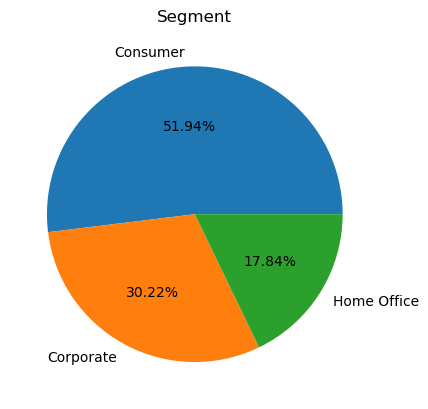

In [ ]:
# there are 3 segments consumer, corporate and home office
# plot pie chart of segment
plt.pie(df['Segment'].value_counts(),labels=df['Segment'].value_counts().index\
        ,autopct='%1.2f%%')
plt.title('Segment')
plt.show()
# consumer segment has the highest orders


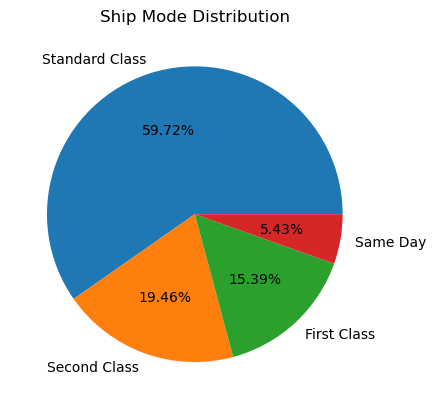

In [35]:
# there is 4 unique values in ship mode
modes=df['Ship Mode'].value_counts()
# there are 4 ship modes First Class, Same Day, Second Class and Standard Class
plt.pie(modes, labels=modes.index, autopct='%1.2f%%')
plt.title('Ship Mode Distribution')
plt.show()
# Standard Class is the most used ship mode


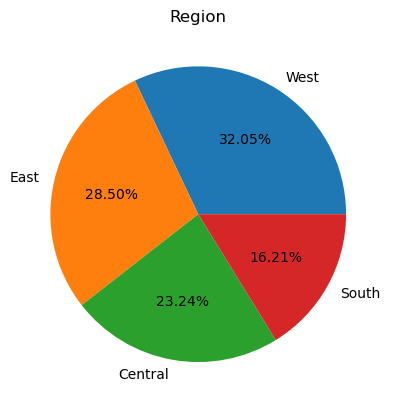

In [36]:
# there are 4 regions East, West, Central and South
# plot pie chart of region
plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index
        ,autopct='%1.2f%%')
plt.title('Region')
plt.show()
# West region has the highest orders


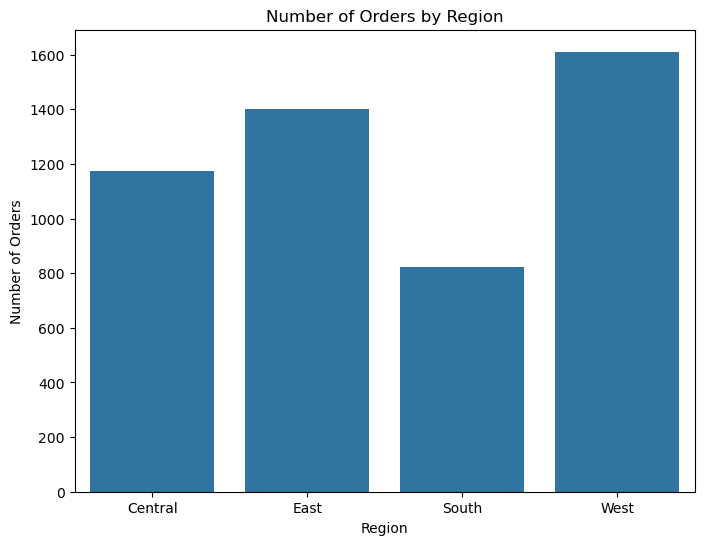

In [22]:
# how many orders in each region after group by order id 
region_orders = df.groupby('Region')['Order ID'].nunique().reset_index()
# plot region orders
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Order ID', data=region_orders)
plt.title('Number of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.show()

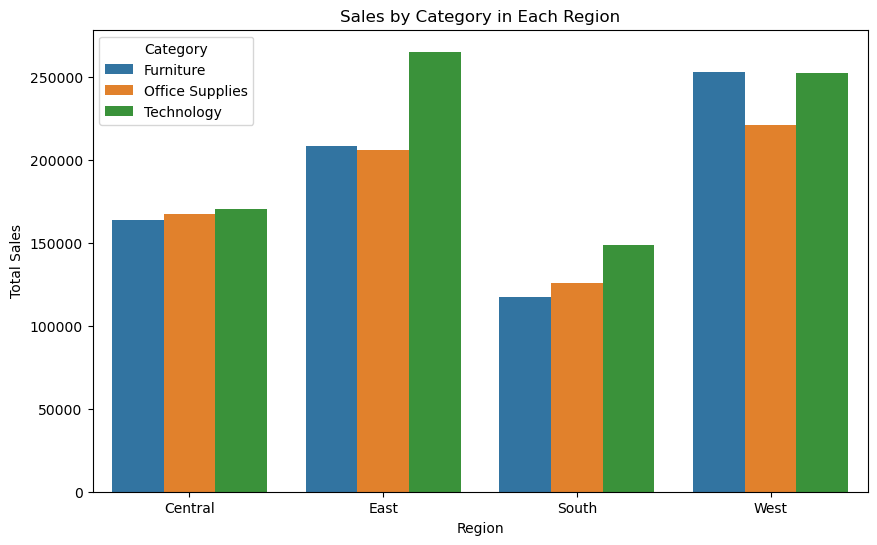

In [23]:
#sales of each category in each region
category_region_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))  
sns.barplot(x='Region', y='Sales', hue='Category', data=category_region_sales)
plt.title('Sales by Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

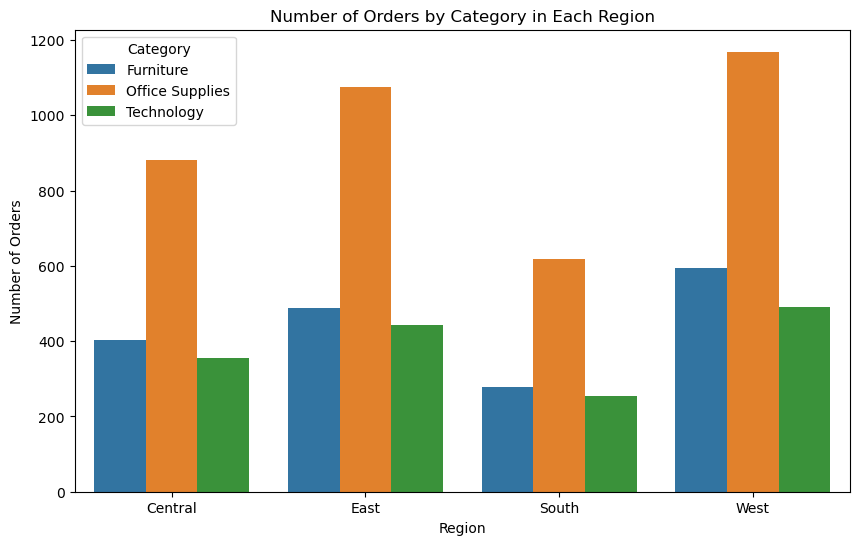

In [24]:
# plot of category , sales ,region in the order id grouped by data
category_region_orders = df.groupby(['Region', 'Category'])['Order ID'].nunique().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Order ID', hue='Category', data=category_region_orders)
plt.title('Number of Orders by Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.show()


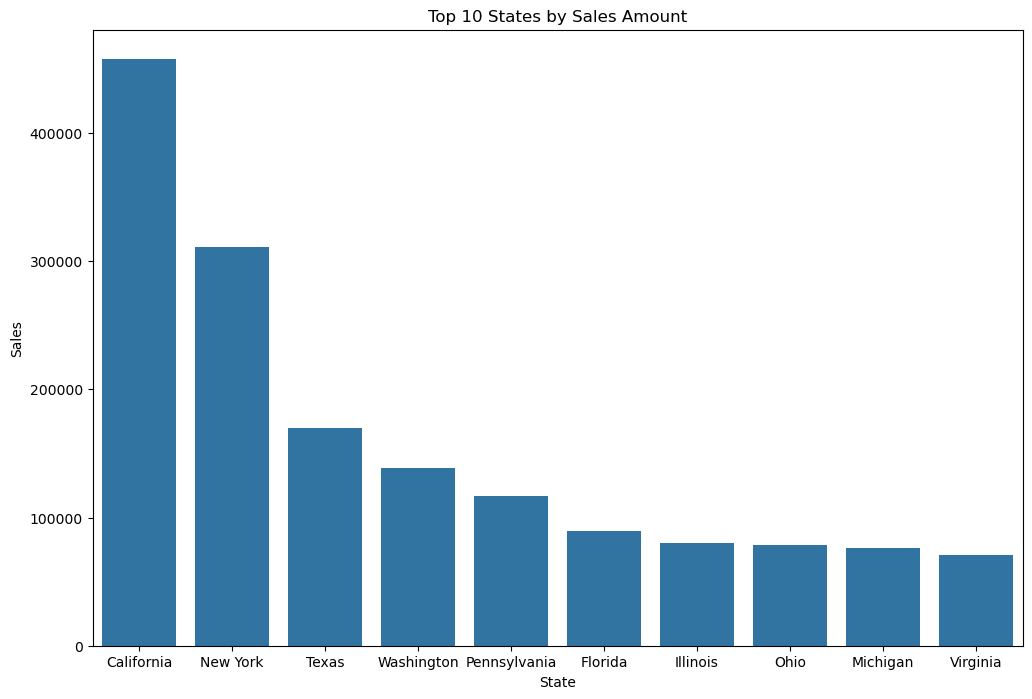

In [83]:
# sales amoubt per state in top 10 states making orders 
state_sales = df.groupby('State')['Sales'].sum().reset_index()
plt.figure(figsize=(12,8))
top_10_states = state_sales.sort_values(by='Sales', ascending=False).head(10)
sns.barplot(x='State', y='Sales', data=top_10_states)   
plt.title('Top 10 States by Sales Amount')
plt.show()
# California has the highest sales amount

In [25]:
# there are 3 unique values in category
df['Category'].value_counts()   
# there are 3 categories Furniture, Office Supplies and Technology

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

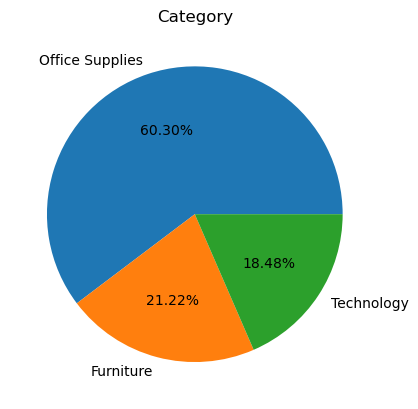

In [ ]:
# plot pie chart of category 
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index\
        ,autopct='%1.2f%%')
plt.title('Category')
plt.show()
# Furniture is the most ordered items category

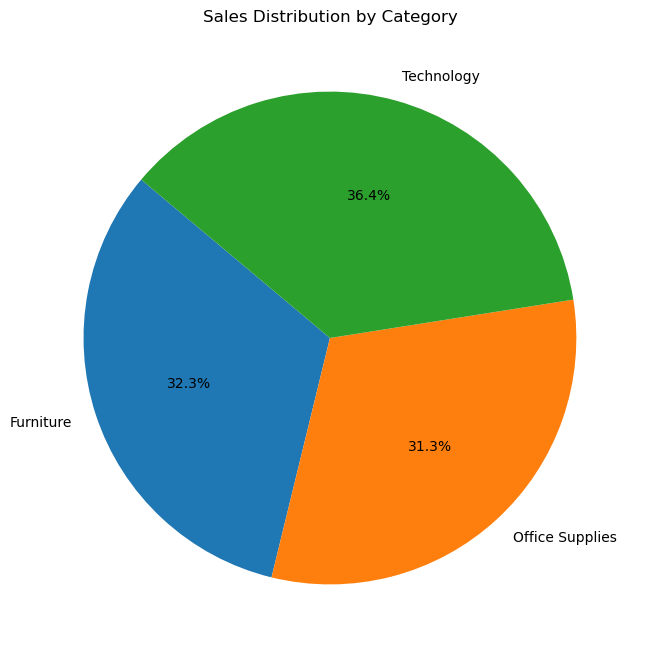

In [ ]:
# sales per category by a pie chart
category_sales = df.groupby('Category')['Sales'].sum().reset_index()    
plt.figure(figsize=(8,8))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.f%%', startangle=140)
plt.title('Sales Distribution by Category')
plt.show()
# technology has the highest sales among categories 

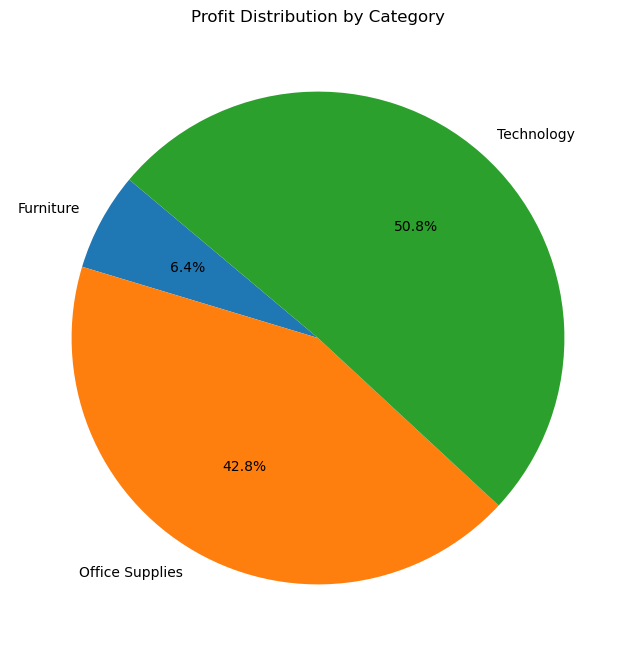

In [ ]:
#EDA and data visulization of  profit per category by a pie chart 
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
plt.figure(figsize=(8,8))
plt.pie(category_profit['Profit'], labels=category_profit['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Profit Distribution by Category')
plt.show()
# Technology category has the highest profit margin among categories
# furniture has lowest profit margin among categories

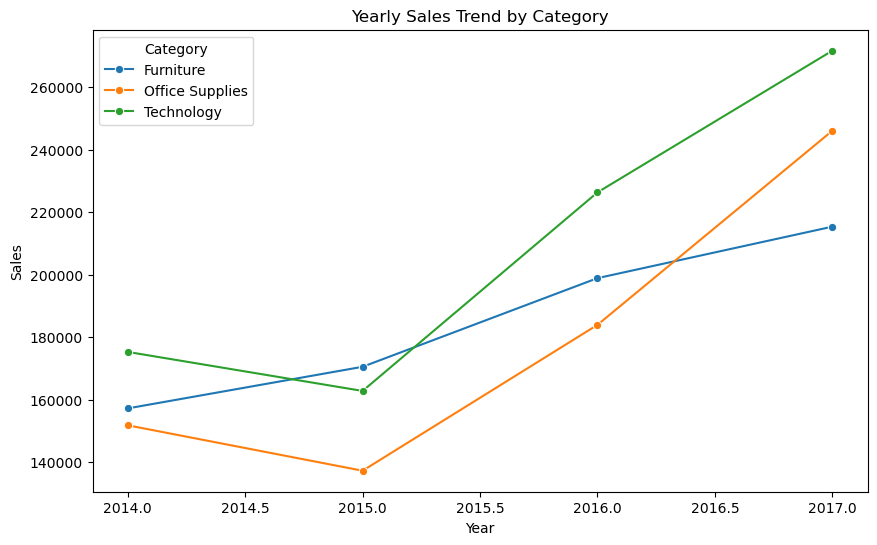

In [28]:
# group by year and sum of sales per each category
df['Year'] = df['Order Date'].dt.year
yearly_category_sales = df.groupby(['Year', 'Category'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))      
sns.lineplot(x='Year', y='Sales', hue='Category', data=yearly_category_sales, marker='o')
plt.title('Yearly Sales Trend by Category')
plt.show()


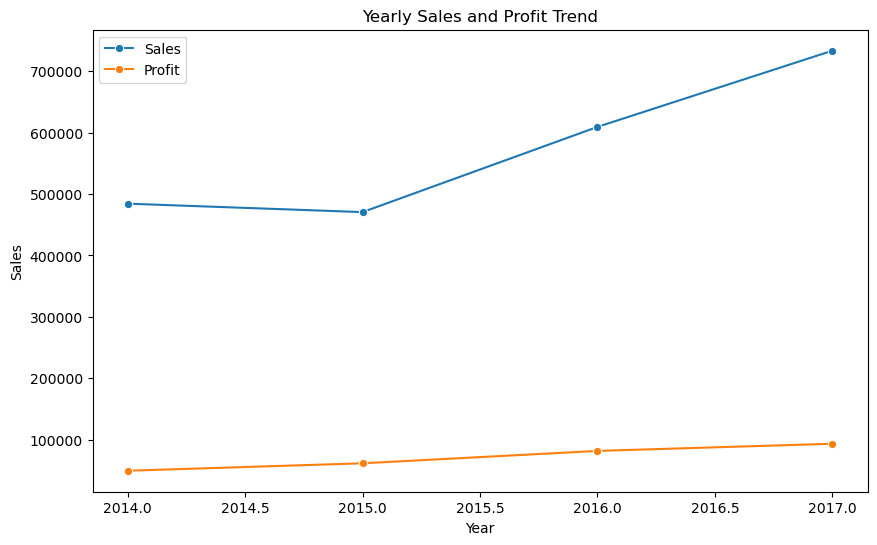

In [ ]:
# sales by years and profit by years line plot 
yearly_sales_profit = df.groupby('Year').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Sales', data=yearly_sales_profit, marker='o', label='Sales')
sns.lineplot(x='Year', y='Profit', data=yearly_sales_profit, marker='o', label='Profit')
plt.title('Yearly Sales and Profit Trend')      
plt.show()

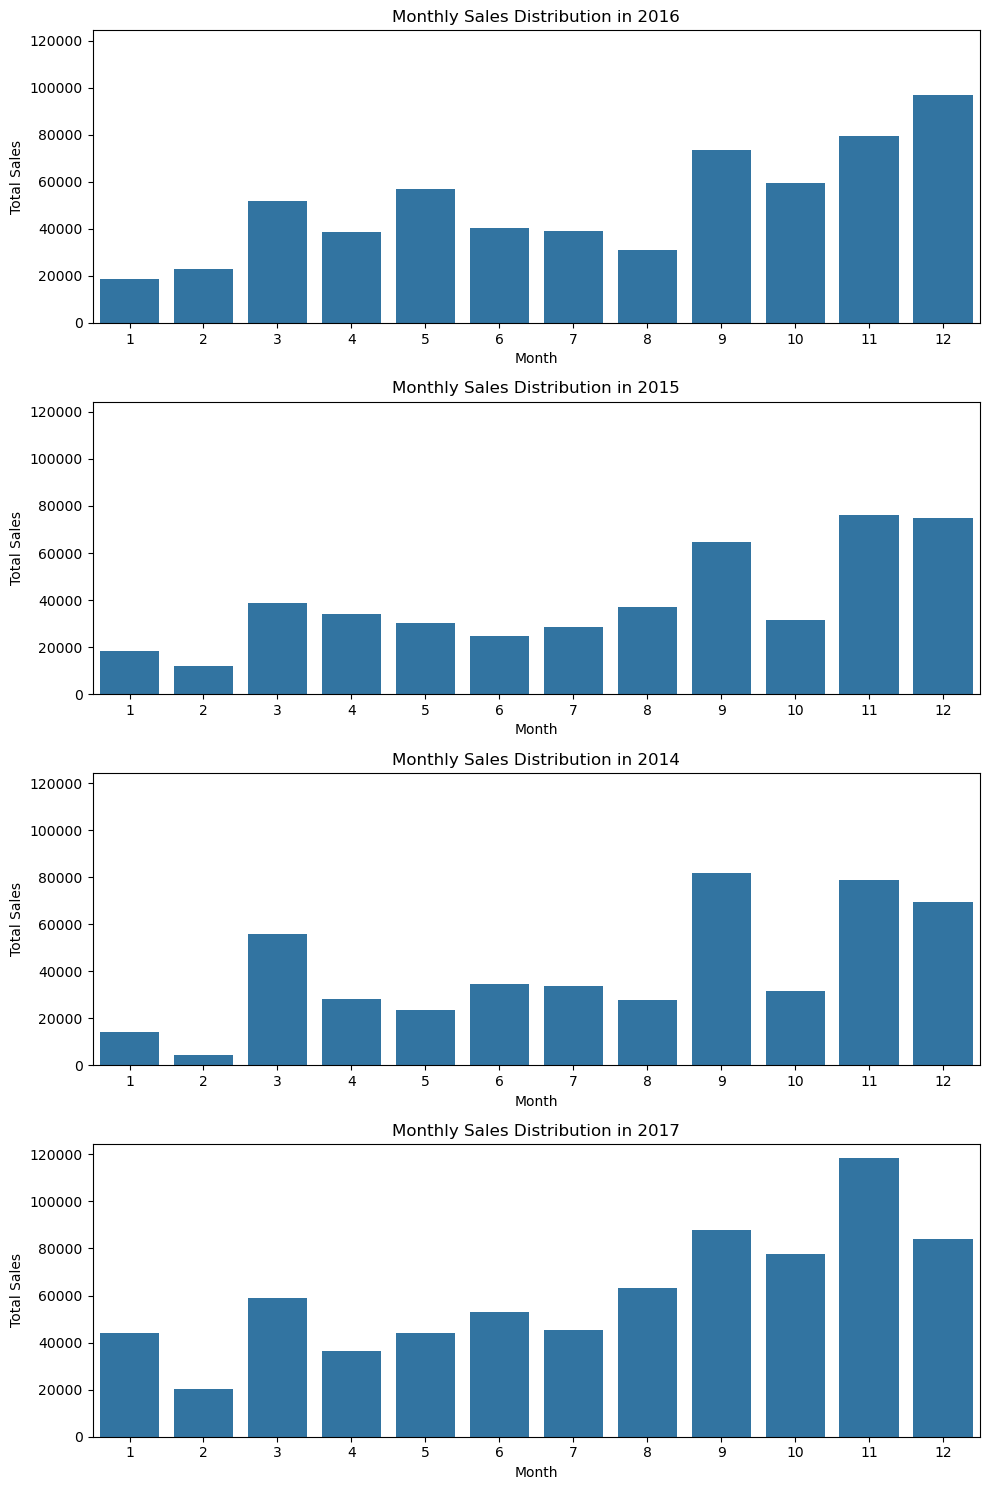

In [45]:
#subplot of each year that contail the months sales distribution
fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharey=True)
years = df['Order Year'].unique()
for i, year in enumerate(years):
    monthly_sales = df[df['Order Year'] == year].groupby('Order Month')['Sales'].sum().reset_index()
    sns.barplot(x='Order Month', y='Sales', data=monthly_sales, ax=axes[i])
    axes[i].set_title(f'Monthly Sales Distribution in {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Total Sales')
plt.tight_layout()
plt.show()



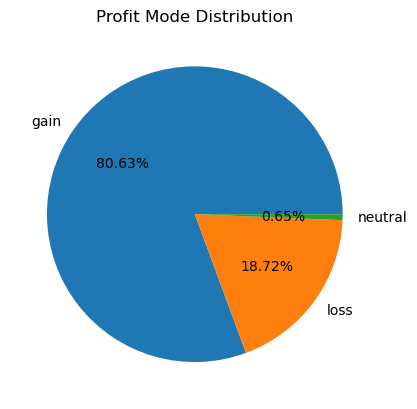

In [ ]:
# plot the profit mode distribution in all orders 
plt.pie(df['profit_mode'].value_counts(), labels=df['profit_mode'].value_counts().index, autopct='%1.2f%%')
plt.title('Profit Mode Distribution')
plt.show()


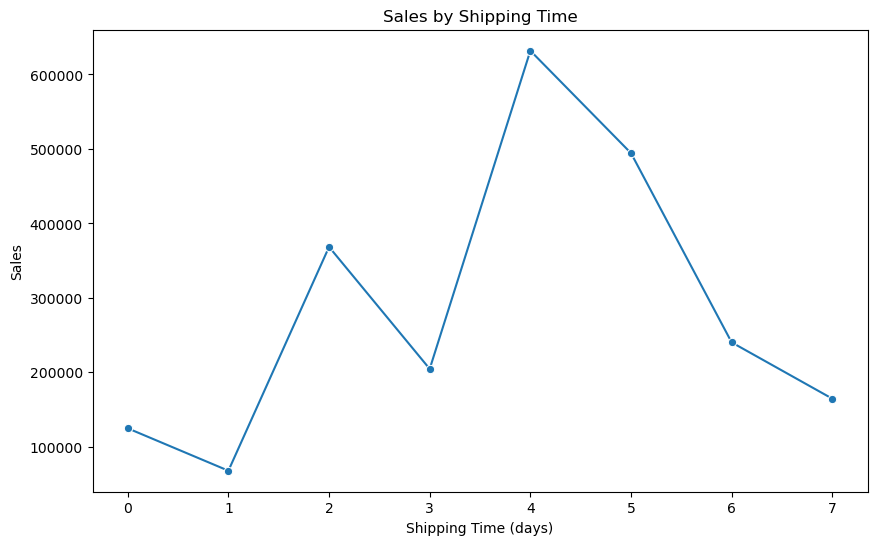

In [ ]:
# delivery speed and sales line plot 
delivery_sales = df.groupby('Shipping Time (days)')['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='Shipping Time (days)', y='Sales', data=delivery_sales, marker='o')
plt.title('Sales by Shipping Time')
plt.show()


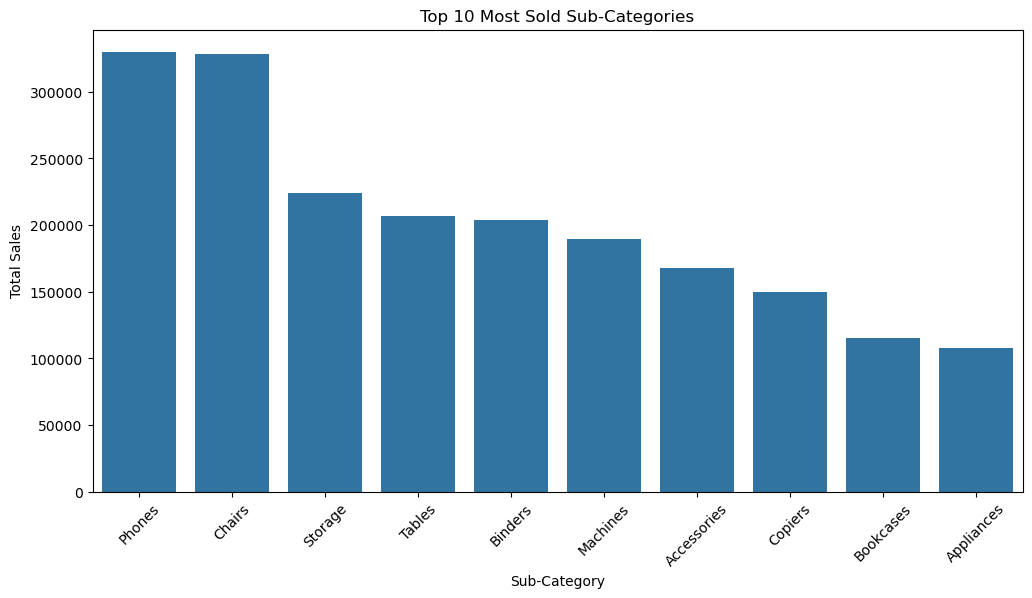

In [81]:
# most saled sub-categories
top_10_saled_subcategories = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Sub-Category', y='Sales', data=top_10_saled_subcategories, order=top_10_saled_subcategories['Sub-Category'])
plt.title('Top 10 Most Sold Sub-Categories')
plt.xticks(rotation=45)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.show()

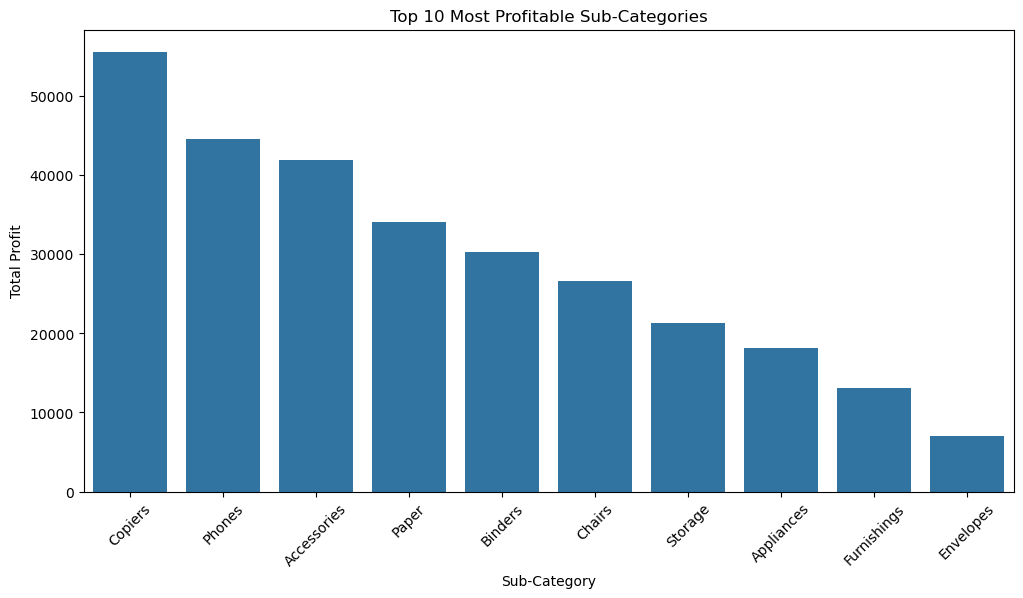

In [80]:
# top 10 most profitable sub-categories
top_10_profitable_subcategories = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Sub-Category', y='Profit', data=top_10_profitable_subcategories, order=top_10_profitable_subcategories['Sub-Category'])
plt.title('Top 10 Most Profitable Sub-Categories')  
plt.xticks(rotation=45)
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.show()

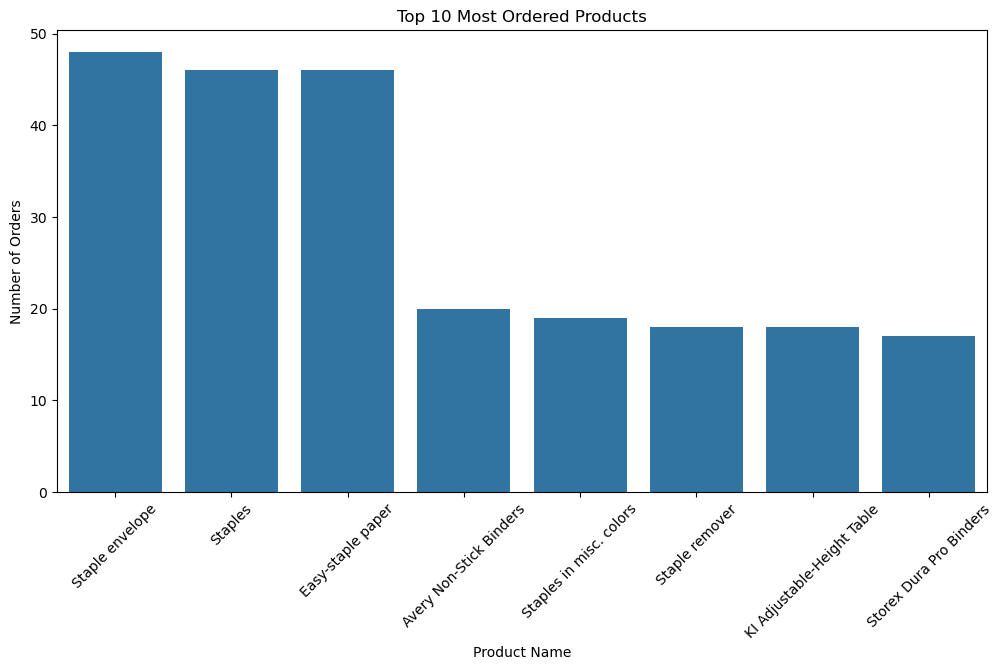

In [74]:
# top 5 most ordered products
products_name_most_ordered = df['Product Name'].value_counts().head(8).reset_index()
products_name_most_ordered=pd.DataFrame(products_name_most_ordered)
products_name_most_ordered
# barplot of the most ordered products
plt.figure(figsize=(12,6))
sns.barplot(x='Product Name', y='count', data=products_name_most_ordered)
plt.title('Top 10 Most Ordered Products')
plt.xticks(rotation=45)
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.show()


In [40]:
# sales of each category over segments
segment_category_sales = df.groupby(['Segment', 'Category'])['Sales'].sum().reset_index
segment_category_sales


<bound method Series.reset_index of Segment      Category       
Consumer     Furniture          391049.3120
             Office Supplies    363952.1360
             Technology         406399.8970
Corporate    Furniture          229019.7858
             Office Supplies    230676.4620
             Technology         246450.1190
Home Office  Furniture          121930.6975
             Office Supplies    124418.4340
             Technology         183304.0170
Name: Sales, dtype: float64>

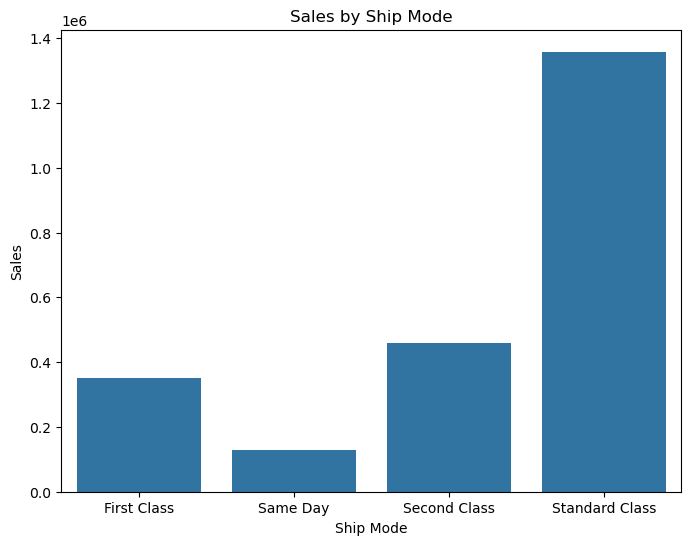

In [75]:
# sales per ship mode
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()
plt.figure(figsize=(8,6))   
sns.barplot(x='Ship Mode', y='Sales', data=shipmode_sales)
plt.title('Sales by Ship Mode')
plt.show()

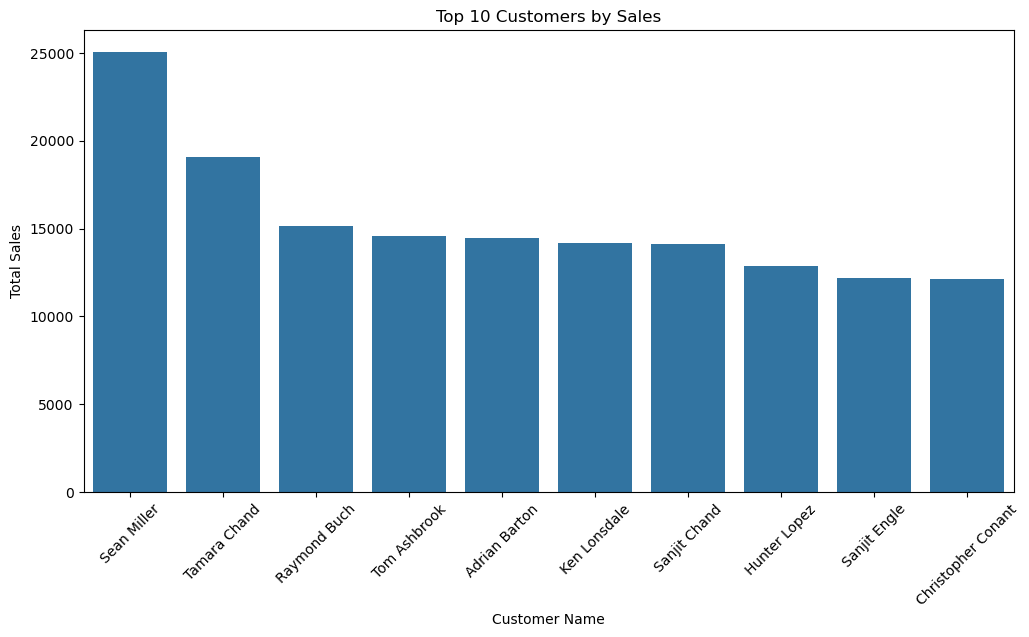

In [76]:
# top 10 customers by sales
top_10_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Customer Name', y='Sales', data=top_10_customers)
plt.title('Top 10 Customers by Sales')
plt.xticks(rotation=45)
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.show()

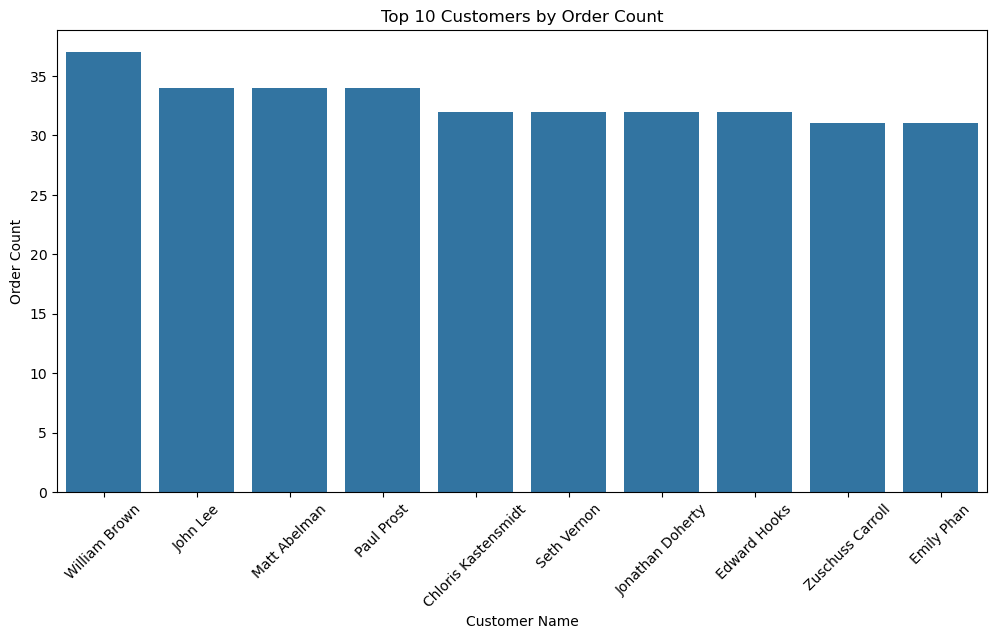

In [79]:
# top 10 customers by order count
top_10_customers_orders = df['Customer Name'].value_counts().head(10).reset_index()
top_10_customers_orders.columns = ['Customer Name', 'Order Count']
plt.figure(figsize=(12,6))
sns.barplot(x='Customer Name', y='Order Count', data=top_10_customers_orders)
plt.title('Top 10 Customers by Order Count')
plt.xticks(rotation=45)    
plt.show()

data analysis report

in the time from 2014 to the first half of 2015 the office supplies and technology sales where decreasing invise virse of furniture where increasing in sales 
from the begining of 2015  the sales in office supplies and technology increased in a signfint way 